In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os, cv2
from tqdm import tqdm 

## 1. 데이터 불러오기

In [2]:
path = "./open/train"
# path 내의 모든 파일 불러옴
file_list = os.listdir(path)

# txt 파일 목록 
txt_list = [f for f in file_list if f.endswith(".txt")]

# 이미지 파일 목록
# png_list = [f for f in file_list if f.endswith(".png")]

### txt 파일 불러오기

In [3]:
# 열 이름 list
col_name = ['class', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
# 열 이름을 지정한 빈 DataFrame 생성(0번째)
df = pd.DataFrame(columns = col_name)

# 모든 파일을 합쳐서(행) 하나의 dataframe으로 확인
for file_name in txt_list:
    # 하나의 txt 파일 불러옴
    new_df = pd.read_csv(os.path.join(path, file_name), sep = " ", header = None) 
    # 열 이름 지정
    new_df.columns = col_name
    # 오른쪽 끝 열에 파일명 추가 (확장자 제외 )
    new_df['file'] = file_name.split('.')[0]
    # df와 new_df 합치기
    df = pd.concat([df, new_df])
    
# index(행) 초기화
df = df.reset_index(drop=True)
# 데이터 형태 확인 
df.head(3)

,class,x1,y1,x2,y2,x3,y3,x4,y4,file
0,9.0,1037,209,1312,209,1312,448,1037,448,syn_00000
1,25.0,804,425,1127,425,1127,783,804,783,syn_00000
2,12.0,330,250,583,250,583,511,330,511,syn_00000


### Image 불러오기

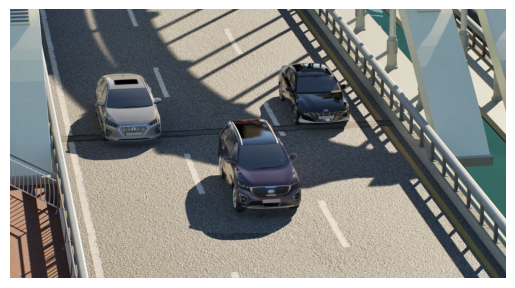

'[IMREAD_COLOR, IMREAD_ANYDEPTH, IMREAD_GRAYSCALE]'

In [4]:
# 이미지 읽어오기 
img = cv2.imread(os.path.join(path, df.iloc[0,-1])+'.png', cv2.IMREAD_COLOR)
# BGR색상을 RGB로
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img 출력 
plt.imshow(img)
plt.axis('off')
plt.show()
'''[IMREAD_COLOR, IMREAD_ANYDEPTH, IMREAD_GRAYSCALE]'''

## 2. 데이터 타입 확인

- 결측치 존재 x
- class: float64(1), 좌표: object(9)
    - 객체 타입 변환 필요
- 1만 7000천 개의 행을 가짐

In [5]:
# Data info 확인 
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   17000 non-null  float64
 1   x1      17000 non-null  object 
 2   y1      17000 non-null  object 
 3   x2      17000 non-null  object 
 4   y2      17000 non-null  object 
 5   x3      17000 non-null  object 
 6   y3      17000 non-null  object 
 7   x4      17000 non-null  object 
 8   y4      17000 non-null  object 
 9   file    17000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
# df['class'] = df['class'].astype(int)
# display(df.head())
# 굳이 정수로 안해도 될 것 같아요 

## 3. 종속변수 확인

In [6]:
# class간에 불균형이 있는지 확인 
df['class'].value_counts()   # 전부 500

class
9.0     500
10.0    500
24.0    500
27.0    500
33.0    500
19.0    500
23.0    500
26.0    500
29.0    500
25.0    500
22.0    500
7.0     500
21.0    500
8.0     500
30.0    500
0.0     500
17.0    500
18.0    500
6.0     500
32.0    500
5.0     500
1.0     500
20.0    500
3.0     500
11.0    500
13.0    500
15.0    500
2.0     500
4.0     500
31.0    500
14.0    500
16.0    500
12.0    500
28.0    500
Name: count, dtype: int64

## 4. 수치형 변수 분포 확인 

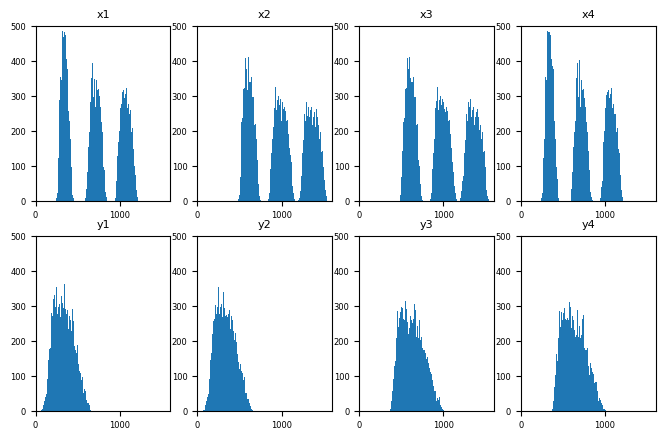

In [7]:
# x1, y1 순서를 x1, x2, ..., y3, y4로 변경(그래프에서 편히 보기 위해)
lst = sorted(list(df.columns[1:-1]))
# 전체 plot 사이즈 지정
fig = plt.figure(figsize = (8, 5))

for num, col in enumerate((lst)):
    # 1 2 3 4 
    # 5 6 7 8 형태의 subplot 생성 
    plt.subplot(2, 4, num+1)
    
    # historgram 
    plt.hist(df[col], bins=100)
    
    # x, y축 구간 설정
    plt.xlim(0, 1600)
    plt.ylim(0, 500)
    
    # x, y축 숫자 폰트 사이즈 조절 
    plt.xticks(fontsize = 6)
    plt.yticks(fontsize = 6)
    
    # subplot별 제목 설정 
    plt.title(col, fontsize = 8)
plt.show()

# 정규화작업 필요 ()

## 5. 이미지 자르기

#### 그대로 자르기 

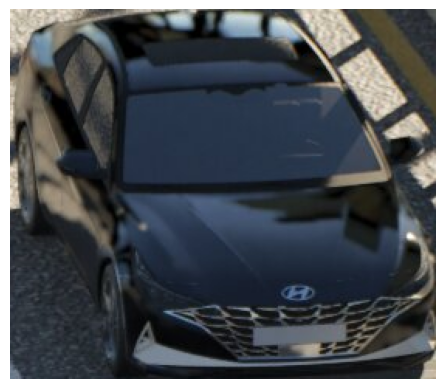

In [8]:
# 이미지 불러오기
img = cv2.imread(os.path.join(path, df.iloc[0, -1]+'.png'), cv2.IMREAD_COLOR)
# BGR로 되어있는 이미지를 RGB로 변경
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# image crop
crop_img = img[df.loc[0,'y1']:df.loc[0,'y3'], 
               df.loc[0,'x1']:df.loc[0,'x3']]

plt.imshow(crop_img)
plt.axis('off')
plt.show()

## 6. class별로 폴더 생성 후 나누기

In [9]:
# enumerate와 같이 쓰면 tqdm이 실행이 안돼요
# 그래서 따로 num을 정의했습니다!
num = 1
for row in tqdm(range(len(df))):
# 이미지 불러오기
    img_name = df.iloc[row, -1]+'.png'
    img = cv2.imread(os.path.join(path, img_name))
    # crop
    crop_img = img[df.loc[row,'y1']:df.loc[row,'y3'], 
                   df.loc[row,'x1']:df.loc[row,'x3']]
    
    # 저장할 디렉토리 생성
        # open : Dacon에서 받은 train, test가 존재하는 폴더 
    if 'train_class' not in os.listdir('./open'):
        os.makedirs('./open/train_class')
        
    class_name = str(df.loc[row, 'class'])
    if class_name not in os.listdir('./open/train_class'):
        os.makedirs("./open/train_class/" + class_name)
        
    # 이미지 저장
    cv2.imwrite("./open/train_class/" + class_name + "/" + str(num) + ".png", crop_img)
    num += 1
    
    

100%|██████████| 17000/17000 [12:28<00:00, 22.71it/s]
